In [112]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [153]:
train_dir = "data/train"
test_dir = "data/test"

# Declare training/testing lists
training_data = []
testing_data = []
class_names = ["oval", "rectangle", "stickman", "triangle"]

# Functions to populate training/testing sets from local directory
def create_training_data():
    for category in class_names:
        class_num = class_names.index(category)
        path = os.path.join(train_dir, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (100, 100))
            training_data.append([new_array, class_num])

def create_testing_data():
    for category in class_names:
        class_num = class_names.index(category)
        path = os.path.join(test_dir, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (100, 100))
            testing_data.append([new_array, class_num])

# Call functions
create_training_data() 
create_testing_data() 

In [154]:
# Shuffle the order of items in each set
random.shuffle(training_data)
random.shuffle(testing_data)

# Test each set to confirm shuffle is properly applied
for sample in training_data[:5]:
    print(sample[1])

print("break")

for sample in testing_data[:5]:
    print(sample[1])

2
2
1
3
3
break
0
3
2
2
0


In [155]:
# Create image/label lists
train_images = []
train_labels = []
test_images = []
test_labels = []

# Assign values to training lists
for features, label in training_data:
    train_images.append(features)
    train_labels.append(label)

train_images = np.array(train_images)

# Assign proper names to training labels
# for i in range(len(train_labels)):
#      if (train_labels[i] == 0):
#          train_labels[i] = "Oval"
#      elif (train_labels[i]  == 1):
#          train_labels[i] = "Rectangle"
#      elif (train_labels[i]  == 2):
#          train_labels[i] = "Stickman"
#      else:
#          train_labels[i] = "Triangle"
        

# Assign values to testing lists
for features, label in testing_data:
    test_images.append(features)
    test_labels.append(label)

test_images = np.array(test_images)

# Assign proper names to testing labels
# for i in range(len(test_labels)):
#      if (test_labels[i]  == 0):
#          test_labels[i] = "Oval"
#      elif (test_labels[i] == 1):
#          test_labels[i] = "Rectangle"
#      elif (test_labels[i] == 2):
#          test_labels[i] = "Stickman"
#      else:
#          test_labels[i] = "Triangle"

# Convert train/test labels to NumPy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(train_images.shape, type(train_images))
print(test_images.shape, type(test_images))

print(train_labels, train_labels.shape, type(train_labels))
print(test_labels, test_labels.shape, type(test_labels))

(160, 100, 100) <class 'numpy.ndarray'>
(20, 100, 100) <class 'numpy.ndarray'>
[2 2 1 3 3 0 0 1 0 2 0 2 2 0 2 1 1 3 2 2 2 1 1 0 0 0 3 1 0 3 3 1 2 0 0 2 1
 0 3 0 3 3 0 0 3 3 2 2 1 3 3 0 1 3 1 2 0 3 1 1 1 0 1 1 1 3 0 1 2 2 1 2 2 1
 1 1 2 1 1 0 2 1 2 3 0 2 0 1 0 3 1 3 3 3 2 1 1 2 3 2 0 3 1 1 0 0 3 2 0 3 3
 2 2 3 1 1 1 2 2 1 0 2 2 3 3 0 2 3 3 3 0 3 3 3 2 1 3 3 0 0 3 2 1 0 2 1 0 0
 2 0 2 0 1 3 0 2 2 0 3 0] (160,) <class 'numpy.ndarray'>
[0 3 2 2 0 3 0 2 1 1 2 3 1 1 1 2 3 0 3 0] (20,) <class 'numpy.ndarray'>


1


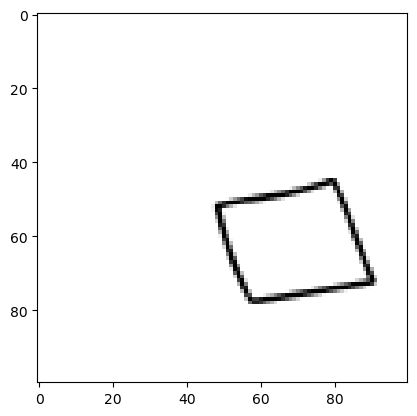

In [156]:
# Test to confirm that image outputs match label categories (training set ranges from 0-159)
val = 21

print(train_labels[val])
plt.imshow(train_images[val], cmap = "gray")
plt.show()

In [157]:
train_images = train_images / 255.0
train_images.shape[1:]

test_images = test_images / 255.0
test_images.shape[1:]



(100, 100)

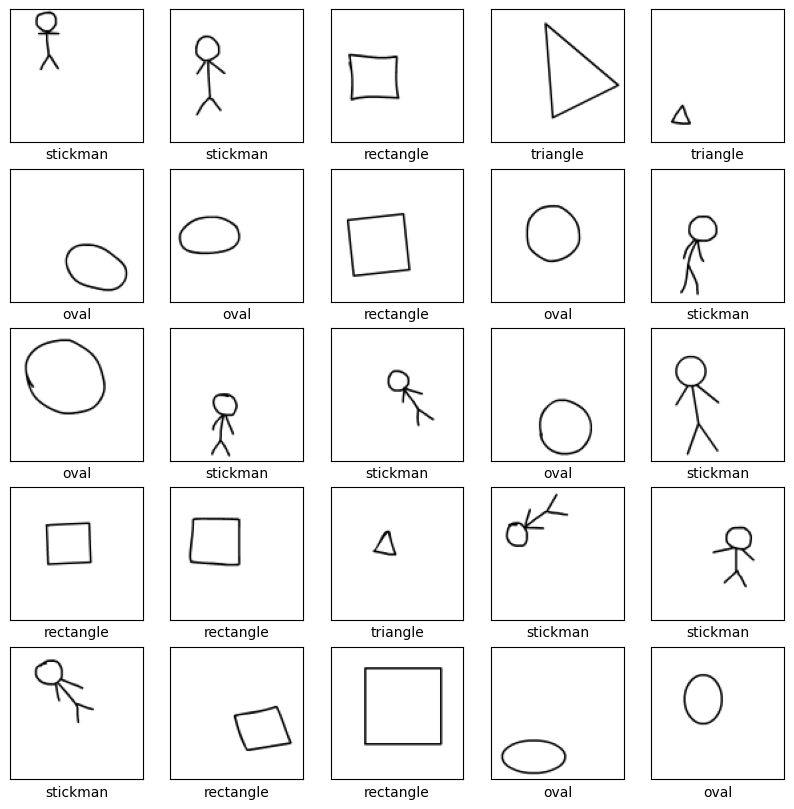

In [158]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = "gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()


<!-- model = Sequential -->

In [159]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (100, 100)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [160]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_37 (Flatten)        (None, 10000)             0         
                                                                 
 dense_74 (Dense)            (None, 128)               1280128   
                                                                 
 dense_75 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,281,418
Trainable params: 1,281,418
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = "adam",
              metrics = ["accuracy"])

In [164]:
model.fit(train_images, train_labels, batch_size = 160, epochs = 10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Chris\miniconda3\envs\core\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (160, 1) and (160, 10) are incompatible
